# Data Analytics Lab Project

#### Samridh Dokania 1MS14CS108
#### Vishal Panjeta 1MS14CS140

###### Problem Statement : Given a new Course Outcome and a list of Course Outcomes mapped to Program Outcomes, map the new Course Outcome to Program Outcomes

In [1]:
# Import the necessary libraries
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn
from pprint import pprint
from gensim.models import Word2Vec
import re
from sklearn.decomposition import PCA
from matplotlib import pyplot, pylab
from Outcomes import *

Using TensorFlow backend.


In [2]:
New_CO = "Getting to know about the structure of a DB"
#^ The new CO  

subjects = ["DA"]
#^ Subject the new CO it is supposed to be mapped to
pylab.rcParams['figure.figsize'] = (20,8)
#New_CO + ", being added to:" + subject

In [3]:
POs = getPOs()
#^ Getting the Program Outcomes
COs = {}
for subject in subjects:
    COs.update(getCOs()[subject])
#^ Getting the existing Course outcomes of the subject
sentences = [re.split(r':| ', x) for x in POs] + [x.split() for x in COs.keys()]
scoreDict, mapped = {}, {}

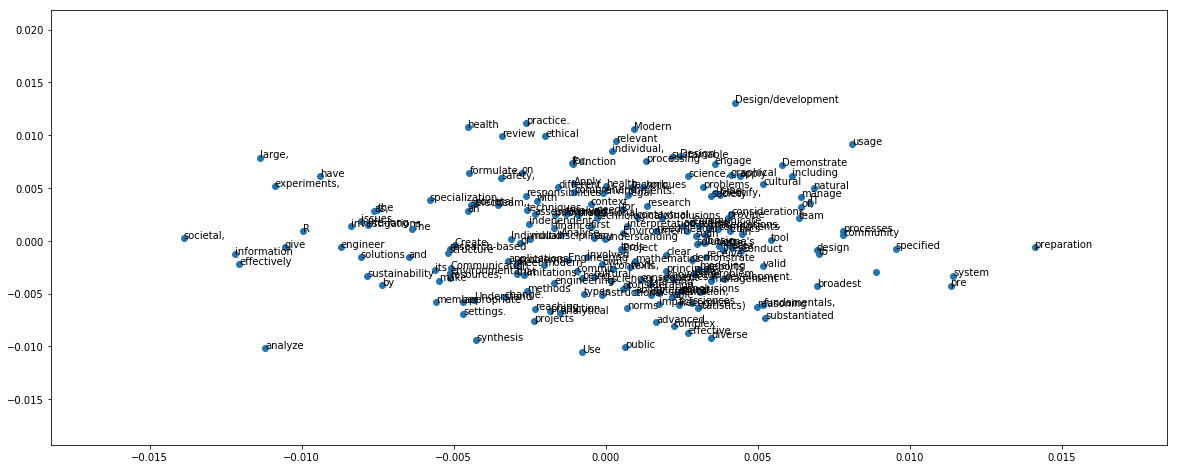

In [4]:
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:]
#words = ["data", "R", "structure", "Engineering"]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [5]:
def penn_to_wn(tag):
    # Function to change tags of the synsets
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None

def tagged_to_synset(word, tag):
    # Add synset tags to the words
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
 
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

def sentence_similarity(sentence1, sentence2):
    # Function to calculate the similarity score between new CO and a given CO 
    
    global scoreDict 
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in pos_tag(word_tokenize(sentence1))]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in pos_tag(word_tokenize(sentence2))]
 
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
 
    score, count = 0.0, 0
    #^ Varibales for counting and scoring
 
    for synset in synsets1:
        best_score = max([synset.path_similarity(ss) for ss in synsets2])
 
        if best_score is not None:
            score += best_score
            count += 1
 
    score /= count
    return score

def symmetric_sentence_similarity(sentence1, sentence2):
    # Function to calculate symmetric similarity i.e. similarity (s1, s2) == similarity(s2, s1)
    return (sentence_similarity(sentence1, sentence2) + sentence_similarity(sentence2, sentence1)) / 2 

"Functions initialised succesfully"

'Functions initialised succesfully'

In [6]:
if len(COs.keys()):
    for CO in COs.keys():
        # Calculate the score of New CO in respect to similarities with the existing COs
        score = symmetric_sentence_similarity(New_CO, CO)
        scoreDict[score] = (CO, COs[CO])
    pprint(sorted(scoreDict.values(), key = lambda x : x[0]))
    flag = 0
else:
    for PO in POs:
        score = symmetric_sentence_similarity(New_CO, PO)
        mapped[score] = PO
    pprint(mapped)
    flag = 1

[('Analyse the different types of data pre processing techniques involved in management of data',
  [2, 3, 5]),
 ('Demonstrate the different classes of analytical techniques (basic and advanced statistics) using R',
  [1, 2, 3, 5]),
 ('Demonstrate the usage of graphical analysis of data using R',
  [1, 2, 3, 5, 12]),
 ('Recognize the need for data analytical applications', [2, 3, 5]),
 ('Understand the different types of data and its structure', [2, 3, 5])]


In [7]:
if not flag:
    for x in sorted(scoreDict.keys(), reverse = True)[:3]:
        pprint ("%s (score = %.5f)" %(scoreDict[x][0], x))
else:
    for x in sorted(mapped.keys(), reverse = True)[:3]:
        pprint ("%s (score = %.5f)" %(mapped[x], x))
#^ prints the closest CO to the new CO in the given subject and their relative similarity score

'Understand the different types of data and its structure (score = 0.41171)'
'Demonstrate the usage of graphical analysis of data using R (score = 0.18852)'
'Demonstrate the different classes of analytical techniques (basic and advanced statistics) using R (score = 0.18704)'


In [8]:
print "Mapped POs are\n\n" 
if flag:
    for x in sorted(mapped.keys(), reverse = True)[:3]:
        pprint ("%s" %(mapped[x]))
else:
    for PO in scoreDict[max(scoreDict.keys())][1]:
        pprint("PO" + str(PO) + " : " + POs[PO - 1])
    #^ prints the mapped POs depending on the closest CO

Mapped POs are


'PO2 : Problem analysis: Identify, formulate, review research literature, and analyze complex engineering problems reaching substantiated conclusions using first principles of mathematics, natural sciences, and engineering sciences.'
'PO3 : Design/development of solutions: Design solutions for complex engineering problems and design system components or processes that meet the specified needs with appropriate consideration for the public health and safety, and the cultural, societal, and environmental considerations. '
'PO5 : Modern tool usage: Create, select, and apply appropriate techniques, resources, and modern engineering and IT tools including prediction and modeling to complex engineering activities with an understanding of the limitations.'
